# Pneumonia Detection using Convolution Neural Network

> In this machine learning model, i am working on classifying the images of patients xray to detect if a patient is affected by Pneumonia or being Normal.

In [105]:
# To silence warnings
import warnings
warnings.filterwarnings('ignore')

## Import Libraries

In [106]:
#Importing necessary libraries needed
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [134]:
import os
import cv2

def get_training_data(data_dir):
    images = []
    labels = ['NORMAL', 'PNEUMONIA']  # Adjust based on your dataset
    for label in labels:
        path = os.path.join(data_dir, label)
        if not os.path.exists(path):
            print(f"Path does not exist: {path}")
            continue  # Skip this label if the path is not valid
        class_num = labels.index(label)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            if not os.path.isfile(img_path):
                print(f"File does not exist: {img_path}")
                continue
            print(f"Reading image: {img_path}")
            img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img_arr is None:
                print(f"Failed to read image: {img_path}")
                continue
            images.append((img_arr, class_num))
    return images

# Call the function
train = get_training_data("C:\\Users\\Zione\\Downloads\\chest_xray\\train")
test = get_training_data("C:\\Users\\Zione\\Downloads\\chest_xray\\test")
val = get_training_data("C:\\Users\\Zione\\Downloads\\chest_xray\\val")


Reading image: C:\Users\Zione\Downloads\chest_xray\train\NORMAL\.DS_Store
Failed to read image: C:\Users\Zione\Downloads\chest_xray\train\NORMAL\.DS_Store
Reading image: C:\Users\Zione\Downloads\chest_xray\train\NORMAL\IM-0115-0001.jpeg
Reading image: C:\Users\Zione\Downloads\chest_xray\train\NORMAL\IM-0117-0001.jpeg
Reading image: C:\Users\Zione\Downloads\chest_xray\train\NORMAL\IM-0119-0001.jpeg
Reading image: C:\Users\Zione\Downloads\chest_xray\train\NORMAL\IM-0122-0001.jpeg
Reading image: C:\Users\Zione\Downloads\chest_xray\train\NORMAL\IM-0125-0001.jpeg
Reading image: C:\Users\Zione\Downloads\chest_xray\train\NORMAL\IM-0127-0001.jpeg
Reading image: C:\Users\Zione\Downloads\chest_xray\train\NORMAL\IM-0128-0001.jpeg
Reading image: C:\Users\Zione\Downloads\chest_xray\train\NORMAL\IM-0129-0001.jpeg
Reading image: C:\Users\Zione\Downloads\chest_xray\train\NORMAL\IM-0131-0001.jpeg
Reading image: C:\Users\Zione\Downloads\chest_xray\train\NORMAL\IM-0133-0001.jpeg
Reading image: C:\Users\Z

<Axes: xlabel='count'>

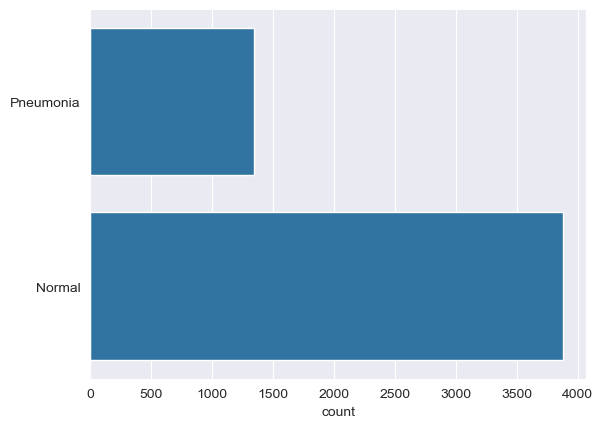

In [69]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)     

Text(0.5, 1.0, 'NORMAL')

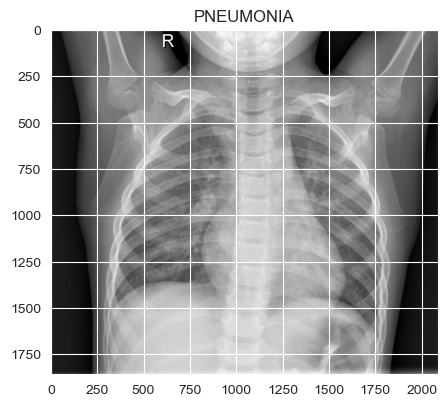

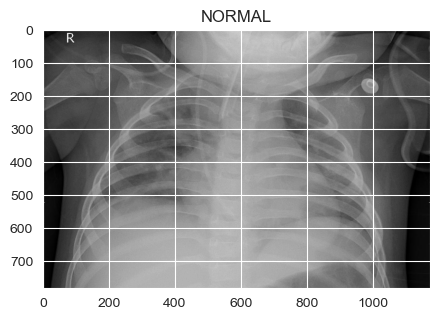

In [70]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

# Data Preparation for Training

### Classifying the dataset into train,test and validation format

In [135]:
import numpy as np

def preprocess_images(images):
    processed_images = []
    for img_arr, class_num in images:
        img_arr = cv2.resize(img_arr, (128, 128))  # Resize to 128x128
        img_arr = img_arr.astype('float32') / 255.0  # Normalize
        processed_images.append((img_arr, class_num))
    return processed_images

train_data = preprocess_images(train)
test_data = preprocess_images(test)
val_data = preprocess_images(val)

## Split the Data

In [136]:
def split_data(data):
    images, labels = zip(*data)
    return np.array(images), np.array(labels)

X_train, y_train = split_data(train_data)
X_val, y_val = split_data(val_data)
X_test, y_test = split_data(test_data)

## Define the Model

In [147]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')  # Output layer for binary classification
])

## Compile the Model

In [148]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Train the Model

In [149]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 57s 327ms/step - accuracy: 0.8159 - loss: 0.4133 - val_accuracy: 0.7500 - val_loss: 0.4647
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 51s 311ms/step - accuracy: 0.9617 - loss: 0.1003 - val_accuracy: 0.6875 - val_loss: 0.5781
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 64s 201ms/step - accuracy: 0.9663 - loss: 0.0868 - val_accuracy: 0.7500 - val_loss: 0.5945
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 34s 210ms/step - accuracy: 0.9810 - loss: 0.0516 - val_accuracy: 0.9375 - val_loss: 0.1248
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 39s 239ms/step - accuracy: 0.9767 - loss: 0.0665 - val_accuracy: 0.8750 - val_loss: 0.3413
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 36s 222ms/step - accuracy: 0.9879 - loss: 0.0332 - val_accuracy: 0.9375 - val_loss: 0.1973
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 37s 227ms/step - accuracy: 0.9917 - loss: 0.0218 - val_accuracy: 0.8750 - val_loss: 0.1896
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 36s 219ms/step - accuracy: 0.9987 - loss: 0

## Model Summary

In [150]:
# Print model summary
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_56 (Conv2D)                   │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_52 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │       3,686,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,116,232 (42.41 MB)

 Trainable params: 3,705,410 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,410,822 (28.27 MB)

#### This provides a detailed overview of the neural network architecture. It shows the type of layer

## Evaluate Model

In [152]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5270 - loss: 4.1366
Test accuracy: 0.7387820482254028


## Make Predictions

In [114]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.6154 - loss: 2.7475
Test accuracy: 0.7772436141967773


In [151]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


## Save the model 

In [154]:
model.save('pneumonia_classifier.keras')

## Deploy Model

In [ ]:
with open("pneumonia.py", "w") as file:
    file.write('''
import streamlit as st
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('pneumonia_classifier.keras')

# Function to preprocess the image
def preprocess_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    image = cv2.resize(image, (150, 150))  # Resize to match model input
    image = image.astype('float32') / 255.0  # Normalize
    return np.expand_dims(image, axis=-1)  # Add channel dimension

# Streamlit app layout
st.title("Pneumonia Detection Model")
st.write("Upload a chest X-ray image:")

# Upload image
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Read the image
    image = cv2.imdecode(np.frombuffer(uploaded_file.read(), np.uint8), cv2.IMREAD_COLOR)

    # Display the uploaded image
    st.image(image, caption='Uploaded Image', use_column_width=True)

    # Preprocess the image
    processed_image = preprocess_image(image)

    # Make prediction
    prediction = model.predict(np.expand_dims(processed_image, axis=0))
    prediction_class = 'PNEUMONIA' if prediction[0][0] > 0.5 else 'NORMAL'

    st.write(f"Prediction: {prediction_class}")'''